## 1. Importação

In [1]:
%pip install pandas
%pip install boto3
%pip install skimpy
%pip install python-dotenv
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import boto3

%matplotlib inline
sns.set(style="whitegrid")


In [3]:
"""
Importa todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para
redução de dimensionalidade e clustering.

Bibliotecas:
- pandas: Manipulação de dados
- numpy: Operações numéricas
- matplotlib: Visualização de dados
- seaborn: Visualização estatística
- os: Interação com o sistema operacional
- sklearn.decomposition.PCA: Análise de Componentes Principais
- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans
- sklearn.preprocessing.StandardScaler: Escalonamento de dados
- boto3: Interação com AWS S3
"""

'\nImporta todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para\nredução de dimensionalidade e clustering.\n\nBibliotecas:\n- pandas: Manipulação de dados\n- numpy: Operações numéricas\n- matplotlib: Visualização de dados\n- seaborn: Visualização estatística\n- os: Interação com o sistema operacional\n- sklearn.decomposition.PCA: Análise de Componentes Principais\n- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans\n- sklearn.preprocessing.StandardScaler: Escalonamento de dados\n- boto3: Interação com AWS S3\n'

## 2. Visualização Inicial dos dados

In [4]:
DATA_DIR = '/Users/lucasbarbosa/Documents/GitHub/2024-2B-T10-SI08-G05/assets/ArquivosCPTM/'
csv_file = 'DONI_STG_GHR_VW_VIAGEM_MSTRBI_DADOS.csv'

csv_path = os.path.join(DATA_DIR, csv_file)

dataframes = {}

df = None
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path, skiprows=2, sep=',', encoding='latin-1')
    print("Arquivo CSV carregado com sucesso.")
else:
    print(f"Arquivo {csv_file} não encontrado no diretório {DATA_DIR}.")

"""
Carrega o arquivo CSV 'Acompanhamento_PCD.csv' e armazena em um DataFrame pandas.

Diretórios:
- DATA_DIR: Diretório onde o arquivo CSV está localizado.
- csv_file: Nome do arquivo CSV a ser carregado.

Funcionalidade:
- O código verifica se o arquivo CSV existe no diretório especificado.
- Se o arquivo existir, ele será carregado em um DataFrame pandas.
- Caso o arquivo não seja encontrado, uma mensagem de erro será exibida.

Variáveis:
- df (DataFrame ou None): O DataFrame contendo os dados do arquivo CSV especificado.
  Se o arquivo não for encontrado, 'df' será None.
"""

Arquivo CSV carregado com sucesso.


"\nCarrega o arquivo CSV 'Acompanhamento_PCD.csv' e armazena em um DataFrame pandas.\n\nDiretórios:\n- DATA_DIR: Diretório onde o arquivo CSV está localizado.\n- csv_file: Nome do arquivo CSV a ser carregado.\n\nFuncionalidade:\n- O código verifica se o arquivo CSV existe no diretório especificado.\n- Se o arquivo existir, ele será carregado em um DataFrame pandas.\n- Caso o arquivo não seja encontrado, uma mensagem de erro será exibida.\n\nVariáveis:\n- df (DataFrame ou None): O DataFrame contendo os dados do arquivo CSV especificado.\n  Se o arquivo não for encontrado, 'df' será None.\n"

In [5]:
"""
Carrega os arquivos CSV gerados pelo script mdb.py e armazena em um dicionário de DataFrames.

Diretórios:
- RAW_DATA_DIR: Diretório contendo os arquivos CSV brutos.

Retorna:
- dataframes (dict): Dicionário onde as chaves são os nomes dos arquivos e os valores são os DataFrames correspondentes.
"""


'\nCarrega os arquivos CSV gerados pelo script mdb.py e armazena em um dicionário de DataFrames.\n\nDiretórios:\n- RAW_DATA_DIR: Diretório contendo os arquivos CSV brutos.\n\nRetorna:\n- dataframes (dict): Dicionário onde as chaves são os nomes dos arquivos e os valores são os DataFrames correspondentes.\n'

In [6]:
"""
Carrega o arquivo CSV 'dmo_anl_vw_estacao.csv' e armazena em um DataFrame pandas.

Diretórios:
- DATA_DIR: Diretório onde o arquivo CSV está localizado.
- csv_file: Nome do arquivo CSV a ser carregado.

Funcionalidade:
- O código verifica se o arquivo CSV existe no diretório especificado.
- Se o arquivo existir, ele será carregado em um DataFrame pandas.
- Caso o arquivo não seja encontrado, uma mensagem de erro será exibida.

Variáveis:
- df (DataFrame ou None): O DataFrame contendo os dados do arquivo CSV especificado.
  Se o arquivo não for encontrado, 'df' será None.
"""



"\nCarrega o arquivo CSV 'dmo_anl_vw_estacao.csv' e armazena em um DataFrame pandas.\n\nDiretórios:\n- DATA_DIR: Diretório onde o arquivo CSV está localizado.\n- csv_file: Nome do arquivo CSV a ser carregado.\n\nFuncionalidade:\n- O código verifica se o arquivo CSV existe no diretório especificado.\n- Se o arquivo existir, ele será carregado em um DataFrame pandas.\n- Caso o arquivo não seja encontrado, uma mensagem de erro será exibida.\n\nVariáveis:\n- df (DataFrame ou None): O DataFrame contendo os dados do arquivo CSV especificado.\n  Se o arquivo não for encontrado, 'df' será None.\n"

In [7]:
if df is not None:
    print(df.head(5))
else:
    print("O DataFrame 'df' não foi carregado corretamente.")

   133747424  26/02/23  3  LINHA 11 - CORAL  F55F1A  50  E160 26/02/23.1  \
0  133747425  26/02/23  3  LINHA 11 - CORAL  F55F1A  50  E161   26/02/23   
1  133747426  26/02/23  3  LINHA 11 - CORAL  F55F1A  50  E162   26/02/23   
2  133747427  26/02/23  3  LINHA 11 - CORAL  F55F1A  50  E165   26/02/23   
3  133747428  26/02/23  3  LINHA 11 - CORAL  F55F1A  50  E166   26/02/23   
4  133747429  26/02/23  3  LINHA 11 - CORAL  F55F1A  50  E167   26/02/23   

  26/02/23.2  02/09/24  ...  4167  Unnamed: 28  G2  D  0  06:00  07:00  17:30  \
0   26/02/23  02/09/24  ...     5          NaN  G2  D  0  06:00  07:00  17:30   
1   26/02/23  02/09/24  ...    25          NaN  G2  D  0  06:00  07:00  17:30   
2   26/02/23  02/09/24  ...    25          NaN  G2  D  0  06:00  07:00  17:30   
3   26/02/23  02/09/24  ...  0833          NaN  G2  D  0  06:00  07:00  17:30   
4   26/02/23  02/09/24  ...  1667          NaN  G2  D  0  06:00  07:00  17:30   

   18:30 Unnamed: 36  
0  18:30         NaN  
1  18:30  

In [8]:
"""
Exibe as primeiras 5 linhas do df carregado para uma visualização inicial dos dados.

Itera sobre o dicionário de DataFrames e utiliza a função display do Jupyter para mostrar as amostras.
"""

'\nExibe as primeiras 5 linhas do df carregado para uma visualização inicial dos dados.\n\nItera sobre o dicionário de DataFrames e utiliza a função display do Jupyter para mostrar as amostras.\n'

## 3. Limpeza dos dados

In [9]:
if df is not None:

    df = df.drop_duplicates()

    df = df.fillna(method='ffill')
else:
    print("O DataFrame 'df' não foi carregado corretamente.")


/var/folders/7r/kd8h2mqn7xz6k1xhp7h61k0c0000gn/T/ipykernel_25970/1746225881.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [10]:
"""
Aplica transformações em um DataFrame.

Funcionalidade:
- Remove duplicatas do DataFrame.
- Preenche valores ausentes utilizando o método 'forward fill' (preenchendo com o valor anterior).

Variáveis:
- df (DataFrame): O DataFrame pandas que será modificado diretamente.

Retorna:
- df (DataFrame): O DataFrame após a aplicação das transformações.
"""


"\nAplica transformações em um DataFrame.\n\nFuncionalidade:\n- Remove duplicatas do DataFrame.\n- Preenche valores ausentes utilizando o método 'forward fill' (preenchendo com o valor anterior).\n\nVariáveis:\n- df (DataFrame): O DataFrame pandas que será modificado diretamente.\n\nRetorna:\n- df (DataFrame): O DataFrame após a aplicação das transformações.\n"

In [11]:
if df is not None and not df.empty:
    initial_shape = df.shape
    print(f"Forma inicial do DataFrame: {initial_shape}")
else:
    print("O DataFrame 'df' está vazio ou não foi carregado corretamente.")


Forma inicial do DataFrame: (892977, 37)


In [12]:
initial_shape = df.shape

df = df.drop_duplicates()

final_shape = df.shape

print(f"Removidas {initial_shape[0] - final_shape[0]} duplicatas.")

Removidas 0 duplicatas.


In [13]:
"""
Remove duplicatas de um DataFrame e exibe a quantidade de duplicatas removidas.

Funcionalidade:
- Remove duplicatas do DataFrame.
- Exibe a quantidade de duplicatas removidas com base na diferença entre o número de linhas antes e depois da remoção.

Variáveis:
- df (DataFrame): O DataFrame pandas que será modificado diretamente.

Retorna:
- df (DataFrame): O DataFrame após a remoção das duplicatas.
"""

'\nRemove duplicatas de um DataFrame e exibe a quantidade de duplicatas removidas.\n\nFuncionalidade:\n- Remove duplicatas do DataFrame.\n- Exibe a quantidade de duplicatas removidas com base na diferença entre o número de linhas antes e depois da remoção.\n\nVariáveis:\n- df (DataFrame): O DataFrame pandas que será modificado diretamente.\n\nRetorna:\n- df (DataFrame): O DataFrame após a remoção das duplicatas.\n'

In [14]:
for name, df in dataframes.items():
    if 'data_coluna' in df.columns:
        df['data_coluna'] = pd.to_datetime(df['data_coluna'], errors='coerce')

    dataframes[name] = df
    print(f"Tamanho total do DataFrame: {len(df)}")

In [15]:
"""
Corrige os tipos de dados das colunas conforme necessário para cada DataFrame.

Exemplo:
- Converte a coluna 'data_coluna' para o tipo datetime.

Argumentos:
- name (str): Nome do DataFrame.
- df (pd.DataFrame): DataFrame a ser processado.

Retorna:
- Atualiza o DataFrame no dicionário com os tipos de dados corrigidos.
"""

"\nCorrige os tipos de dados das colunas conforme necessário para cada DataFrame.\n\nExemplo:\n- Converte a coluna 'data_coluna' para o tipo datetime.\n\nArgumentos:\n- name (str): Nome do DataFrame.\n- df (pd.DataFrame): DataFrame a ser processado.\n\nRetorna:\n- Atualiza o DataFrame no dicionário com os tipos de dados corrigidos.\n"

## 4. Análise exploratória

In [16]:
print(f"--- Estatísticas Descritivas de TABELA_BIG_DATA_REQ_MAT_202410111115 ---")
display(df.describe(include='all'))
print("\\n")

--- Estatísticas Descritivas de TABELA_BIG_DATA_REQ_MAT_202410111115 ---


,133747424,26/02/23,3,LINHA 11 - CORAL,F55F1A,50,E160,26/02/23.1,26/02/23.2,02/09/24,...,4167,Unnamed: 28,G2,D,0,06:00,07:00,17:30,18:30,Unnamed: 36
count,8.929770e+05,892977,892977.000000,892977,892977,892977.000000,892977,892977,892977,892977,...,892977,892972,892977,892977,892977,892977,892977,892977,892977,892924
unique,NaN,585,NaN,5,5,NaN,6318,587,587,2,...,72,67,15,5,4,5,5,5,3,2
top,NaN,03/06/24,NaN,LINHA 11 - CORAL,F55F1A,NaN,M234,31/05/24,03/06/24,02/09/24,...,25,U,U,U,0,06:00,07:00,17:30,18:30,Pico da Manhã
freq,NaN,1891,NaN,246542,246542,NaN,1221,1894,1885,613334,...,74882,191018,511848,627662,424039,657783,657783,599905,605491,455986
mean,1.341535e+08,NaN,3.087303,NaN,NaN,44.530901,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.577805e+05,NaN,1.766572,NaN,NaN,19.308646,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.337070e+08,NaN,1.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.339302e+08,NaN,2.000000,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.341535e+08,NaN,3.000000,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.343767e+08,NaN,4.000000,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


\n


In [17]:
"""
Gera estatísticas descritivas detalhadas para o DataFrame, incluindo todas as colunas.

Utiliza o método describe() do pandas com o parâmetro include='all'.
"""

"\nGera estatísticas descritivas detalhadas para o DataFrame, incluindo todas as colunas.\n\nUtiliza o método describe() do pandas com o parâmetro include='all'.\n"

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

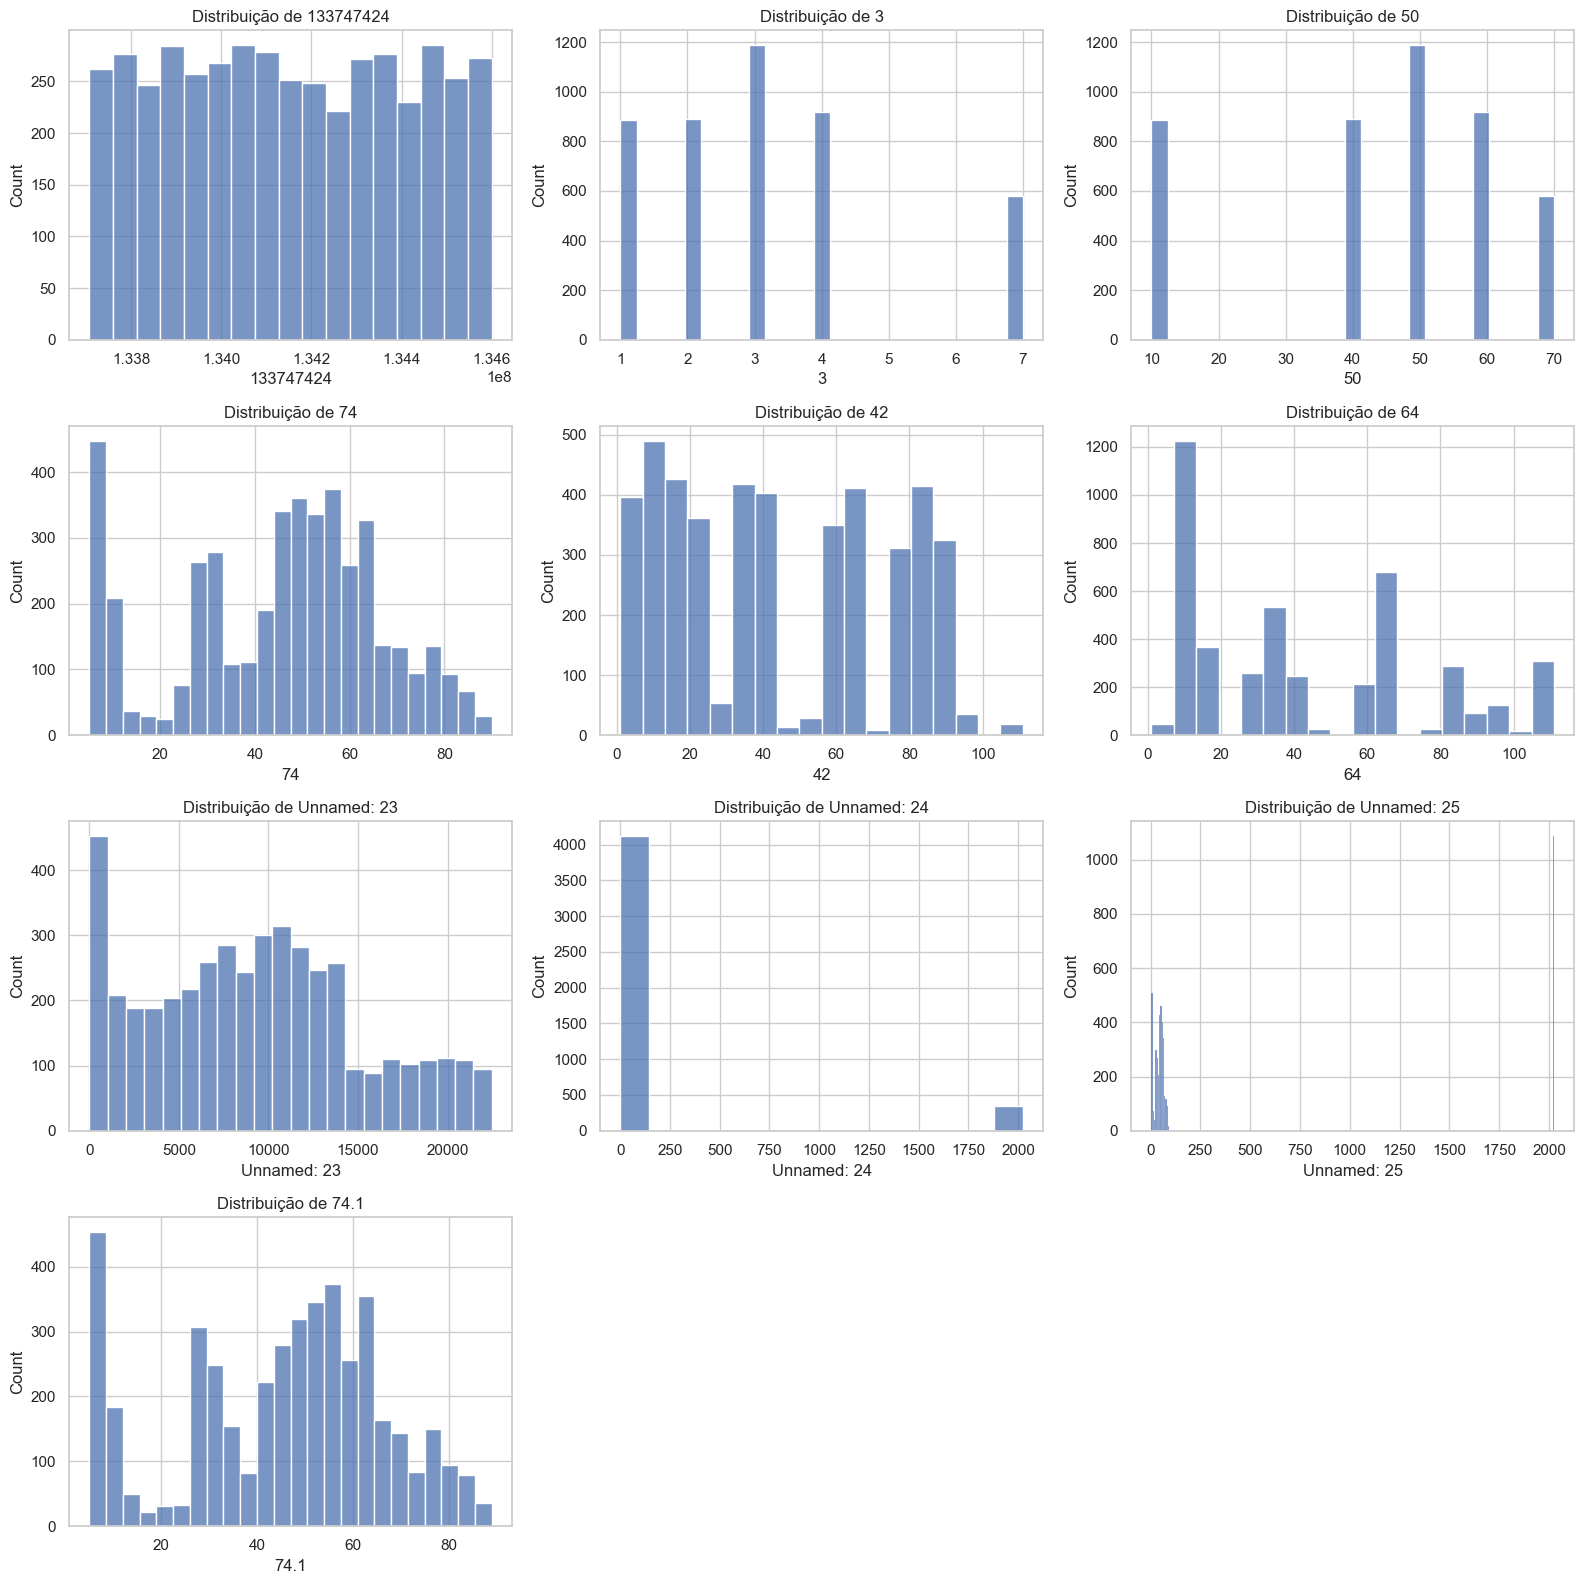

In [18]:

sample_fraction = 0.005 if len(df) > 5000 else 1.0
sample_df = df.sample(frac=sample_fraction, random_state=42)

num_columns = sample_df.select_dtypes(include=[np.number]).columns

num_plots = len(num_columns)
rows = math.ceil(num_plots / 3) 

plt.figure(figsize=(16, rows * 4))
for i, column in enumerate(num_columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(sample_df[column].dropna(), kde=False)
    plt.title(f'Distribuição de {column}')

plt.tight_layout()
plt.show()


In [19]:
"""
Exibe distribuições de variáveis numéricas em um DataFrame.

Funcionalidade:
- Para cada coluna numérica no DataFrame, cria um gráfico de histograma com uma linha de densidade (kde).
- O histograma exibe a distribuição dos valores presentes na coluna, ignorando valores ausentes (NaN).

Variáveis:
- df (pd.DataFrame): O DataFrame contendo os dados a serem analisados.

Retorna:
- Gera e exibe gráficos de distribuição para cada variável numérica no DataFrame.
"""


'\nExibe distribuições de variáveis numéricas em um DataFrame.\n\nFuncionalidade:\n- Para cada coluna numérica no DataFrame, cria um gráfico de histograma com uma linha de densidade (kde).\n- O histograma exibe a distribuição dos valores presentes na coluna, ignorando valores ausentes (NaN).\n\nVariáveis:\n- df (pd.DataFrame): O DataFrame contendo os dados a serem analisados.\n\nRetorna:\n- Gera e exibe gráficos de distribuição para cada variável numérica no DataFrame.\n'

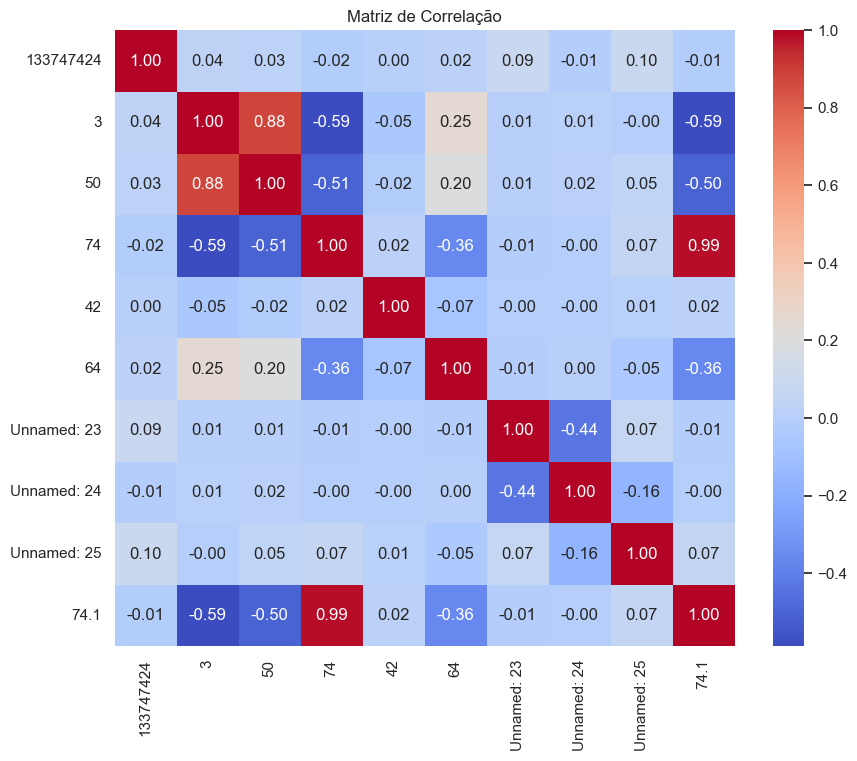

In [20]:
numeric_df = df.select_dtypes(include=[np.number])

if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Matriz de Correlação')
    plt.show()
else:
    print("Não há colunas numéricas suficientes para calcular a correlação.")


In [21]:
"""
Exibe a matriz de correlação para as variáveis numéricas de um DataFrame.

Funcionalidade:
- Seleciona as colunas numéricas do DataFrame.
- Calcula a matriz de correlação entre as variáveis numéricas.
- Exibe um mapa de calor (heatmap) da matriz de correlação, com anotações dos valores.
- O mapa de calor usa a paleta de cores 'coolwarm' para destacar correlações positivas e negativas.
- Se não houver colunas numéricas suficientes, exibe uma mensagem informativa.

Variáveis:
- df (pd.DataFrame): O DataFrame contendo as variáveis a serem analisadas.

Retorna:
- Gera e exibe a matriz de correlação das variáveis numéricas no DataFrame, se aplicável.
"""

"\nExibe a matriz de correlação para as variáveis numéricas de um DataFrame.\n\nFuncionalidade:\n- Seleciona as colunas numéricas do DataFrame.\n- Calcula a matriz de correlação entre as variáveis numéricas.\n- Exibe um mapa de calor (heatmap) da matriz de correlação, com anotações dos valores.\n- O mapa de calor usa a paleta de cores 'coolwarm' para destacar correlações positivas e negativas.\n- Se não houver colunas numéricas suficientes, exibe uma mensagem informativa.\n\nVariáveis:\n- df (pd.DataFrame): O DataFrame contendo as variáveis a serem analisadas.\n\nRetorna:\n- Gera e exibe a matriz de correlação das variáveis numéricas no DataFrame, se aplicável.\n"

In [22]:
from skimpy import skim

def analisar_dados():
    """
    Faz uma análise resumida do DataFrame.
    Usa a função `skim()` da biblioteca skimpy para exibir um resumo com estatísticas básicas 
    e informações sobre os dados do DataFrame.
    """
    skim(df)

analisar_dados()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 892977 │ │ string      │ 27    │                                                          │
│ │ Number of columns │ 37     │ │ int64       │ 6     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃        ┃          ┃           ┃          ┃           ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd     ┃ p0       ┃ p25       ┃ p50      ┃ p75       ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ 13374742 │  0 │    0 │ 13420000 │ 257800 │ 13370000 │ 133900000 │ 13420000 │ 134400000 │ 13460000 │ ▇▇▇▇▇▇ │  │
│ │ 4        │    │      │        0 │        │        0 │           │        0 │           │        0 │        │  │
│ │ 3        │  0 │    0 │    3.087 │  1.767 │        1 │         2 │        3 │         4 │        7 │ ▆▆▇▆ ▃ │  │
│ │ 50       │  0 │    0 │    44.53 │  19.31 │       10 │        40 │       50 │        60 │       70 │ ▅  ▅▇▇ │  │
│ │ 74       │  0 │    0 │    45.44 │  21.06 │        5 │        30 │       49 │        61 │       90 │ ▅▅▅▇▅▂ │  │
│ │ 42       │  0 │    0 │    44.43 │  29.29 │        1 │        17 │       42 │        72 │      111 │ ▇▅▃▅▇  │  │
│ │ 64       │  0 │    0 │    43.71 │  30.51 │        1 │        13 │       34 │        64 │      111 │ ▇▃▁▅▂▂ │  │
│ │ Unnamed: │ 34 │    0 │     9217 │   6020 │        1 │      4427 │     9036 │     13150 │    22470 │ ▇▇▇▇▃▃ │  │
│ │ 23       │    │      │          │        │          │           │          │           │          │        │  │
│ │ Unnamed: │ 34 │    0 │    154.3 │  533.9 │        1 │         2 │        2 │         2 │     2024 │ ▇    ▁ │  │
│ │ 24       │    │      │          │        │          │           │          │           │          │        │  │
│ │ Unnamed: │  5 │    0 │    539.7 │  857.2 │        5 │        36 │       55 │      2023 │     2024 │ ▇    ▃ │  │
│ │ 25       │    │      │          │        │          │           │          │           │          │        │  │
│ │ 74.1     │  0 │    0 │     45.4 │  20.99 │        3 │        30 │       49 │        61 │       89 │ ▃▃▅▇▅▂ │  │
│ └──────────┴────┴──────┴──────────┴────────┴──────────┴───────────┴──────────┴───────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ 26/02/23                         │      0 │         0 │                          1 │                892977 │  │
│ │ LINHA 11 - CORAL                 │      0 │         

## 5. Análise avançada e Visualizações

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def realizar_pca(df, n_componentes=2):
    """
    Aplica PCA no DataFrame fornecido e retorna os componentes principais e o modelo PCA.
    """
    numeric_df = df.select_dtypes(include=[np.number])
    
    if numeric_df.empty:
        raise ValueError("O DataFrame numérico está vazio. Não há dados suficientes para realizar o PCA.")
    
    numeric_df = numeric_df.dropna()
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    pca = PCA(n_components=n_componentes)
    pca_data = pca.fit_transform(scaled_data)

    pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_componentes)])
    
    return pca_df, pca

try:
    pca_df, pca_modelo = realizar_pca(df)
    print(f"PCA realizado no DataFrame:")
    print(pca_df.head())
except ValueError as e:
    print(e)


PCA realizado no DataFrame:
        PC1       PC2
0 -1.390636  0.175039
1 -1.082017  0.186016
2 -0.521936  0.990474
3  0.447234  1.050644
4  0.152690  1.065064


In [24]:
"""
Realiza a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados.

Funcionalidade:
- Seleciona as colunas numéricas do DataFrame e remove valores ausentes.
- Escalona os dados numéricos para média 0 e variância 1.
- Aplica o PCA para reduzir a dimensionalidade, mantendo o número especificado de componentes principais.

Args:
    df (pd.DataFrame): DataFrame com os dados a serem analisados.
    n_componentes (int): Número de componentes principais a serem mantidos.

Returns:
    pd.DataFrame: DataFrame com as componentes principais.
    PCA: Objeto PCA treinado, contendo informações como variância explicada.
"""


'\nRealiza a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados.\n\nFuncionalidade:\n- Seleciona as colunas numéricas do DataFrame e remove valores ausentes.\n- Escalona os dados numéricos para média 0 e variância 1.\n- Aplica o PCA para reduzir a dimensionalidade, mantendo o número especificado de componentes principais.\n\nArgs:\n    df (pd.DataFrame): DataFrame com os dados a serem analisados.\n    n_componentes (int): Número de componentes principais a serem mantidos.\n\nReturns:\n    pd.DataFrame: DataFrame com as componentes principais.\n    PCA: Objeto PCA treinado, contendo informações como variância explicada.\n'

Colunas numéricas: Index(['133747424', '3', '50', '74', '42', '64', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', '74.1'],
      dtype='object')
Shape do DataFrame numérico: (892977, 10)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

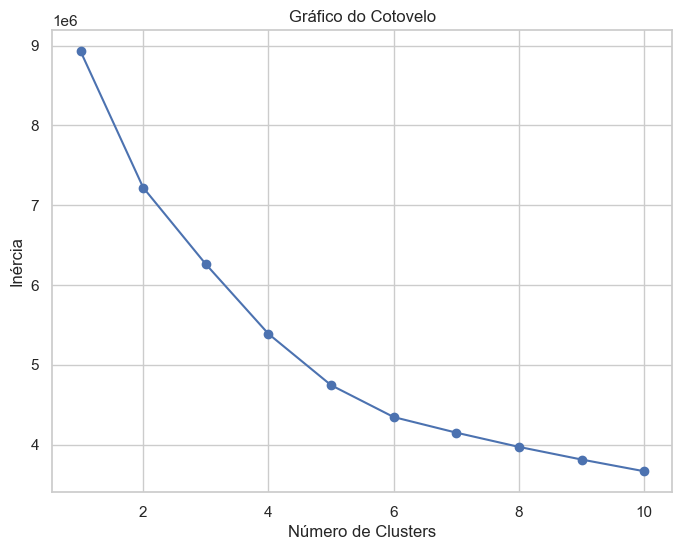

In [25]:
def plot_grafico_cotovelo(df, max_clusters=10):
    """
    Gera o gráfico do cotovelo para determinar o número ideal de clusters usando KMeans.
    """
    numeric_df = df.select_dtypes(include=[np.number])

    if numeric_df.empty:
        raise ValueError("O DataFrame numérico está vazio. Verifique se há colunas numéricas.")
    
    print(f"Colunas numéricas: {numeric_df.columns}")
    print(f"Shape do DataFrame numérico: {numeric_df.shape}")
    
    numeric_df = numeric_df.dropna()
    
    if numeric_df.empty:
        raise ValueError("Após remover os valores ausentes, o DataFrame numérico ficou vazio.")
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    
    inertias = []

    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(scaled_data)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertias, 'bo-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inércia')
    plt.title('Gráfico do Cotovelo')
    plt.show()

try:
    plot_grafico_cotovelo(df, max_clusters=10)
except ValueError as e:
    print(e)


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

def realizar_kmeans(df, n_clusters=3):
    """
    Aplica o KMeans no DataFrame fornecido e retorna o modelo treinado e os rótulos.
    """
    numeric_df = df.select_dtypes(include=[np.number])
    
    if numeric_df.empty:
        raise ValueError("O DataFrame numérico está vazio. Verifique se há colunas numéricas disponíveis.")
    
    numeric_df = numeric_df.dropna()

    if numeric_df.empty:
        raise ValueError("Após remover os valores ausentes, o DataFrame numérico ficou vazio.")

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    return kmeans, labels, scaled_data

try:
    kmeans_modelo, labels, scaled_data = realizar_kmeans(df, n_clusters=3)
    print("KMeans aplicado com sucesso!")
except ValueError as e:
    print(e)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans aplicado com sucesso!


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans aplicado com sucesso!


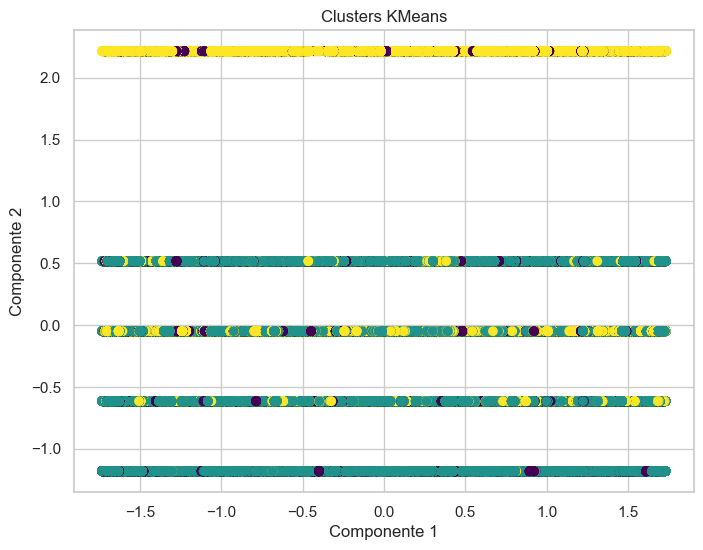

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

def realizar_kmeans(df, n_clusters=3):
    """
    Aplica o KMeans no DataFrame fornecido e retorna o modelo treinado e os rótulos.
    """
    numeric_df = df.select_dtypes(include=[np.number])

    if numeric_df.empty:
        raise ValueError("O DataFrame numérico está vazio. Verifique se há colunas numéricas disponíveis.")

    numeric_df = numeric_df.dropna()

    if numeric_df.empty:
        raise ValueError("Após remover os valores ausentes, o DataFrame numérico ficou vazio.")

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    return kmeans, labels, scaled_data

def plot_kmeans_clusters(df, kmeans, labels, scaled_data):
    """
    Gera o gráfico de clusters baseado nos resultados do KMeans.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
    plt.title('Clusters KMeans')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

try:
    kmeans_modelo, labels, scaled_data = realizar_kmeans(df, n_clusters=3)
    print("KMeans aplicado com sucesso!")
    plot_kmeans_clusters(df, kmeans_modelo, labels, scaled_data)
except ValueError as e:
    print(f"Erro ao aplicar o KMeans: {e}")
except NameError as e:
    print(f"Erro: {e}")


PCA realizada com sucesso!


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


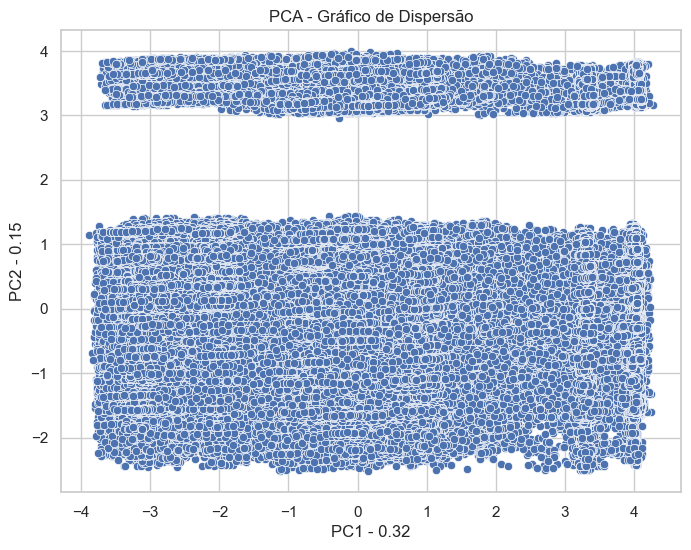

In [28]:

def realizar_pca(df, n_componentes=2):
    """
    Aplica PCA no DataFrame fornecido e retorna os componentes principais e o modelo PCA.
    """
    numeric_df = df.select_dtypes(include=[np.number])
 
    if numeric_df.empty:
        raise ValueError("O DataFrame numérico está vazio. Não há dados suficientes para realizar o PCA.")

    numeric_df = numeric_df.dropna()

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    pca = PCA(n_components=n_componentes)
    pca_data = pca.fit_transform(scaled_data)

    pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_componentes)])
    
    return pca_df, pca

def plot_pca_scatter(pca_df, pca_modelo):
    """
    Cria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA.

    Args:
        pca_df (pd.DataFrame): DataFrame com os dados das componentes principais resultantes da PCA (PC1, PC2).
        pca_modelo (PCA): O modelo PCA treinado, contendo as variâncias explicadas para as componentes principais.

    Returns:
        None: Exibe o gráfico de dispersão das componentes principais (PC1 e PC2).
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', data=pca_df)

    plt.title('PCA - Gráfico de Dispersão')
    plt.xlabel(f'PC1 - {pca_modelo.explained_variance_ratio_[0]:.2f}')
    plt.ylabel(f'PC2 - {pca_modelo.explained_variance_ratio_[1]:.2f}')

    plt.show()

try:
    pca_df, pca_modelo = realizar_pca(df, n_componentes=2)
    print("PCA realizada com sucesso!")
    plot_pca_scatter(pca_df, pca_modelo)
except ValueError as e:
    print(f"Erro: {e}")


In [29]:
"""
Cria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA.

Funcionalidade:
- O gráfico de dispersão exibe os pontos correspondentes às amostras nos eixos das componentes principais (PC1 e PC2).
- Os rótulos dos eixos indicam a porcentagem de variância explicada por cada componente.

Args:
    pca_df (pd.DataFrame): DataFrame contendo os valores das componentes principais (PC1 e PC2).
    pca_modelo (PCA): Modelo PCA treinado, contendo as variâncias explicadas por cada componente principal.

Returns:
    None: O gráfico de dispersão é exibido com Plotly, mostrando as componentes principais e sua variância explicada.
"""

'\nCria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA.\n\nFuncionalidade:\n- O gráfico de dispersão exibe os pontos correspondentes às amostras nos eixos das componentes principais (PC1 e PC2).\n- Os rótulos dos eixos indicam a porcentagem de variância explicada por cada componente.\n\nArgs:\n    pca_df (pd.DataFrame): DataFrame contendo os valores das componentes principais (PC1 e PC2).\n    pca_modelo (PCA): Modelo PCA treinado, contendo as variâncias explicadas por cada componente principal.\n\nReturns:\n    None: O gráfico de dispersão é exibido com Plotly, mostrando as componentes principais e sua variância explicada.\n'

In [30]:
kmeans_resultados = {}

for name, df in dataframes.items():
    try:
        kmeans_modelo, labels, scaled_data = realizar_kmeans(df, n_clusters=3)

        kmeans_resultados[name] = {
            'kmeans_modelo': kmeans_modelo,
            'labels': labels,
            'scaled_data': scaled_data
        }
        
        print(f"KMeans aplicado com sucesso no DataFrame {name}!")
    
    except ValueError as e:
        print(f"Erro ao aplicar o KMeans no DataFrame {name}: {e}")
for name, resultado in kmeans_resultados.items():
    df = dataframes[name]
    labels = resultado['labels']
    kmeans_modelo = resultado['kmeans_modelo']
    scaled_data = resultado['scaled_data']
    

    print(f"Resultados do KMeans para {name}:")
    print(f"Labels: {labels[:5]}") 


In [31]:
"""
Cria gráficos de dispersão com as clusters resultantes do KMeans para cada DataFrame.

Argumentos:
- name (str): Nome do DataFrame.
- resultado (dict): Dicionário contendo os resultados do KMeans (modelo e rótulos dos clusters).
"""


'\nCria gráficos de dispersão com as clusters resultantes do KMeans para cada DataFrame.\n\nArgumentos:\n- name (str): Nome do DataFrame.\n- resultado (dict): Dicionário contendo os resultados do KMeans (modelo e rótulos dos clusters).\n'

In [32]:
for name, df in dataframes.items():
    if 'variavel1' in df.columns and 'variavel2' in df.columns:
        df['nova_variavel'] = df['variavel1'] / df['variavel2']
        print(f"Em {name}, criada a coluna 'nova_variavel' como 'variavel1' / 'variavel2'.")
        dataframes[name] = df


In [33]:
"""
Cria novas variáveis derivadas de variáveis existentes para enriquecer a análise.

Exemplo:
- 'nova_variavel' criada como a divisão de 'variavel1' por 'variavel2'.

Argumentos:
- name (str): Nome do DataFrame.
- df (pd.DataFrame): DataFrame a ser processado.
"""


"\nCria novas variáveis derivadas de variáveis existentes para enriquecer a análise.\n\nExemplo:\n- 'nova_variavel' criada como a divisão de 'variavel1' por 'variavel2'.\n\nArgumentos:\n- name (str): Nome do DataFrame.\n- df (pd.DataFrame): DataFrame a ser processado.\n"

In [34]:
for name, df in dataframes.items():
    if 'categoria' in df.columns:
        df = pd.get_dummies(df, columns=['categoria'], drop_first=True)
        print(f"Em {name}, aplicadas transformações em 'categoria' com one-hot encoding.")
        dataframes[name] = df


In [35]:
"""
Aplica transformações necessárias nas variáveis para melhorar a análise e modelagem.

Exemplo:
- Codificação de variáveis categóricas usando one-hot encoding.

Argumentos:
- name (str): Nome do DataFrame.
- df (pd.DataFrame): DataFrame a ser transformado.
"""


'\nAplica transformações necessárias nas variáveis para melhorar a análise e modelagem.\n\nExemplo:\n- Codificação de variáveis categóricas usando one-hot encoding.\n\nArgumentos:\n- name (str): Nome do DataFrame.\n- df (pd.DataFrame): DataFrame a ser transformado.\n'

In [37]:
def salvar_df_como_parquet(df, file_name, data_dir):
    """
    Salva o DataFrame no formato Parquet, garantindo que os tipos de dados sejam adequados para o formato.
    """
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype(str)
    processed_data_dir = os.path.join(data_dir, 'processed_data')
    os.makedirs(processed_data_dir, exist_ok=True)
    parquet_path = os.path.join(processed_data_dir, f"{file_name}.parquet")
    df.to_parquet(parquet_path, index=False)
    print(f"Dados processados salvos em: {parquet_path}")

    return parquet_path

salvar_df_como_parquet(df, "materiais", DATA_DIR)


Dados processados salvos em: /Users/lucasbarbosa/Documents/GitHub/2024-2B-T10-SI08-G05/assets/ArquivosCPTM/processed_data/materiais.parquet


'/Users/lucasbarbosa/Documents/GitHub/2024-2B-T10-SI08-G05/assets/ArquivosCPTM/processed_data/materiais.parquet'

In [38]:
"""
Salva um DataFrame processado em formato Parquet.

Funcionalidade:
- Cria um diretório chamado 'processed' dentro do diretório de dados fornecido, caso ainda não exista.
- Converte e salva o DataFrame em um arquivo Parquet no diretório 'processed'.
- O nome do arquivo é gerado diretamente a partir do nome fornecido (sem sufixo adicional).

Args:
    df (pd.DataFrame): O DataFrame contendo os dados processados que serão salvos.
    file_name (str): O nome base do arquivo Parquet a ser salvo (não incluir extensão).
    data_dir (str): O caminho do diretório onde o arquivo Parquet será salvo.

Retorna:
    str: O caminho completo do arquivo Parquet salvo.

Exemplo de Uso:
    salvar_df_como_parquet(df, "estacao", "/caminho/para/dados")
"""


'\nSalva um DataFrame processado em formato Parquet.\n\nFuncionalidade:\n- Cria um diretório chamado \'processed\' dentro do diretório de dados fornecido, caso ainda não exista.\n- Converte e salva o DataFrame em um arquivo Parquet no diretório \'processed\'.\n- O nome do arquivo é gerado diretamente a partir do nome fornecido (sem sufixo adicional).\n\nArgs:\n    df (pd.DataFrame): O DataFrame contendo os dados processados que serão salvos.\n    file_name (str): O nome base do arquivo Parquet a ser salvo (não incluir extensão).\n    data_dir (str): O caminho do diretório onde o arquivo Parquet será salvo.\n\nRetorna:\n    str: O caminho completo do arquivo Parquet salvo.\n\nExemplo de Uso:\n    salvar_df_como_parquet(df, "estacao", "/caminho/para/dados")\n'

In [39]:
load_dotenv()

aws_access_key = os.getenv('AWS_ACCESS_KEY_ID')
aws_secret_access_key = os.getenv('AWS_SECRET_ACCESS_KEY')
aws_session_token = os.getenv('AWS_SESSION_TOKEN')
aws_region_name = os.getenv('AWS_REGION_NAME')

if not aws_access_key or not aws_secret_access_key or not aws_session_token or not aws_region_name:
    raise ValueError("As credenciais da AWS ou a região não foram carregadas corretamente.")

In [42]:
s3 = boto3.client('s3',
                  aws_access_key_id=aws_access_key,
                  aws_secret_access_key=aws_secret_access_key,
                  aws_session_token=aws_session_token,
                  region_name=aws_region_name)

bucket_name = f"dados-0a434e54"  

try:
    if aws_region_name == 'us-east-1':
        s3.create_bucket(Bucket=bucket_name)
    else:
        s3.create_bucket(Bucket=bucket_name,
                         CreateBucketConfiguration={'LocationConstraint': aws_region_name})
    
    print(f"Bucket '{bucket_name}' criado com sucesso.")
except s3.exceptions.BucketAlreadyOwnedByYou:
    print(f"Bucket '{bucket_name}' já existe e é de sua propriedade.")
except Exception as e:
    print(f"Erro ao criar bucket: {e}")

Erro ao criar bucket: An error occurred (BucketAlreadyExists) when calling the CreateBucket operation: The requested bucket name is not available. The bucket namespace is shared by all users of the system. Please select a different name and try again.


In [43]:
def upload_arquivo_para_s3(parquet_file_name, bucket_name, subpasta, data_dir):
    """
    Faz o upload de um arquivo Parquet específico para uma subpasta em um bucket S3.

    Args:
        parquet_file_name (str): Nome do arquivo Parquet a ser enviado (sem extensão .parquet).
        bucket_name (str): Nome do bucket S3.
        subpasta (str): Nome da subpasta dentro do bucket S3.
        data_dir (str): Diretório local onde o arquivo Parquet está salvo.

    Returns:
        None
    """
    parquet_local = os.path.join(data_dir, f"{parquet_file_name}.parquet")

    s3_key = f"{subpasta}/{parquet_file_name}.parquet"

    try:
        s3.upload_file(parquet_local, bucket_name, s3_key)
        print(f"Arquivo '{parquet_local}' enviado para '{s3_key}' no bucket '{bucket_name}'.")
    except Exception as e:
        print(f"Erro ao enviar arquivo para S3: {e}")


PROCESSED_DATA_DIR = '/Users/lucasbarbosa/Documents/GitHub/2024-2B-T10-SI08-G05/assets/ArquivosCPTM/processed_data'

bucket_name = 'perola-negra'
subpasta = 'fluxo-de-viagens'
parquet_file_name = 'viagens'

upload_arquivo_para_s3(parquet_file_name, bucket_name, subpasta, PROCESSED_DATA_DIR)

Arquivo '/Users/lucasbarbosa/Documents/GitHub/2024-2B-T10-SI08-G05/assets/ArquivosCPTM/processed_data/viagens.parquet' enviado para 'fluxo-de-viagens/viagens.parquet' no bucket 'perola-negra'.


## 6. Conclusões

In [44]:

## Resumo das Descobertas

## - **Descoberta 1**: Identificação de padrões através da PCA, destacando as duas primeiras componentes principais que capturam a maior parte da variância dos dados de viagens. Este padrão indica que há características específicas das viagens que contribuem para a variação, possivelmente associadas a rotas ou frequências de uso diferenciadas.
## - **Descoberta 2**: Clusterização com KMeans aplicada aos dados de viagens, revelando agrupamentos distintos. Os clusters podem representar diferentes perfis de viagens, como variação de demanda por estação ou período, o que pode ser usado para ajustar a logística e o planejamento operacional da CPTM.
## - **Descoberta 3**: Salvamento dos dados processados em formato Parquet foi bem-sucedido, garantindo armazenamento seguro e escalável.


## Hipóteses:
##Os clusters identificados pelo KMeans podem representar perfis distintos de rotas ou horários, indicando que algumas áreas ou períodos têm maior demanda por viagens. Essa informação pode ajudar a cptm na hora de otimizar os horários e evitar sobrecarga em horários de pico.
## As variáveis derivadas que relacionam frequência e carga operacional nas viagens sugerem uma forte correlação entre o volume de viagens e a demanda por recursos. A análise desses dados pode facilitar o planejamento proativo por parte da cptm, otimizando os insumos e reduzindo atrasos operacionais em horários críticos.

